In [1]:
#running a pipeline on spinach images for contours

In [2]:
import sys, traceback
import cv2
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv



In [15]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
pcv.params.debug = None

In [4]:
ls dataset/test/spinach/images

2022_05_15_07_12_10.png  2022_05_20_07_25_15.png  2022_05_25_07_16_58.png
2022_05_16_07_10_14.png  2022_05_21_07_23_25.png  2022_05_26_07_15_39.png
2022_05_17_07_08_12.png  2022_05_22_07_21_46.png  2022_05_27_07_13_35.png
2022_05_18_07_29_08.png  2022_05_23_07_19_46.png  2022_05_28_07_11_39.png
2022_05_19_07_27_12.png  2022_05_24_07_17_54.png  2022_05_29_07_09_34.png


In [5]:

# Read image
#img, path, filename = pcv.readimage(filename='dataset/test/spinach/images/2022_05_29_07_09_34.png')
#prediction_img, prediction_path, prediction_filename = pcv.readimage(filename='dataset/test/spinach/predictions/2022_05_29_07_09_34.png')
#pcv.plot_image(img)
#pcv.plot_image(prediction_img)

In [16]:
#Load data

dir = os.path.join("dataset/test/spinach/images", "*.png")
file_list = [file for file in glob(dir)]
file_list.sort()

dir = os.path.join("dataset/test/spinach/predictions", "*.png")
filled_list = [file for file in glob(dir)]
filled_list.sort()

In [17]:
img_dict = dict(zip(file_list, filled_list))
output_list = []

for image,prediction in img_dict.items():
    print(img, prediction)

    # Read image
    img, path, filename = pcv.readimage(filename=image)
    prediction_img, prediction_path, prediction_filename = pcv.readimage(filename=prediction)

    height, width = img.shape[:2]

    prediction_img_resized = pcv.transform.resize(img=prediction_img, size=(width, height), interpolation="auto")
    
    
    # Apply Mask (for VIS images, mask_color=white)
    masked = pcv.apply_mask(img=img, mask=prediction_img_resized, mask_color='white')
    masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')
    maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                      max_value=255, object_type='light')
    ab_fill = pcv.fill(bin_img=maskedb_thresh, size=150)
    masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')
    id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)
    roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=0, y=0, h=height, w=width)
    roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                                   roi_hierarchy=roi_hierarchy, 
                                                                   object_contour=id_objects, 
                                                                   obj_hierarchy=obj_hierarchy,
                                                                   roi_type='partial')
    obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)
    output  = cv2.drawContours(img, obj, -1,(300,100,200),thickness=2 )
    
    output_list.append(output)
    
output_array = []
for filename in filled_list:
    output_img = plt.imread(filename)
    output_array.append(output_img)
    


[[[ 14   3   4]
  [ 16   5   6]
  [ 17   6   8]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]

 [[ 10   1   4]
  [ 12   3   6]
  [ 13   4   7]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]

 [[ 12   3   5]
  [ 12   4   5]
  [ 14   6   8]
  ...
  [ 57  66  53]
  [255 100 200]
  [255 100 200]]

 ...

 [[  6   0   2]
  [  5   0   2]
  [  4   0   2]
  ...
  [ 45  51  37]
  [107 133 110]
  [ 79 107 108]]

 [[  8   0   5]
  [  6   0   5]
  [  6   0   4]
  ...
  [ 21  23  17]
  [ 80  84  66]
  [117 110  91]]

 [[  9   0   6]
  [  7   0   5]
  [  6   0   4]
  ...
  [ 15  16  17]
  [ 38  34  37]
  [ 90  77  69]]] dataset/test/spinach/predictions/2022_05_15_07_12_10.png
[[[ 12   5  10]
  [ 12   5  10]
  [ 11   4   9]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]

 [[ 13   6  11]
  [ 12   5  10]
  [ 12   5  10]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]

 [[ 14   8  11]
  [ 12   6   9]
  [ 13   7  11]
  ...
  [ 23  37  35]
  [255 100 200]
  [255 100 200]]

 

[[[  8   2   7]
  [  9   3   8]
  [  7   1   6]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]

 [[  8   2   7]
  [  9   3   8]
  [  8   2   7]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]

 [[  7   1   6]
  [  8   2   7]
  [  8   2   7]
  ...
  [ 14  24  26]
  [255 100 200]
  [255 100 200]]

 ...

 [[  5   0   3]
  [  4   0   3]
  [  1   0   1]
  ...
  [ 25  33  33]
  [255 100 200]
  [255 100 200]]

 [[  5   0   4]
  [  5   0   4]
  [  4   0   3]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]

 [[  3   0   3]
  [  3   0   3]
  [  2   0   2]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]] dataset/test/spinach/predictions/2022_05_28_07_11_39.png
[[[  3   2   6]
  [  3   2   6]
  [  3   2   6]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]

 [[  2   1   5]
  [  2   1   5]
  [  3   2   6]
  ...
  [255 100 200]
  [255 100 200]
  [255 100 200]]

 [[  5   2   7]
  [  5   2   6]
  [  6   3   8]
  ...
  [ 24  42  44]
  [255 100 200]
  [255 100 200]]

 

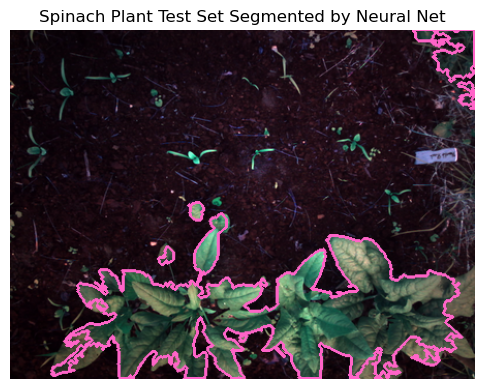

In [19]:
fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=100)
ax.axis('off')
ax.set_title('Spinach Plant Test Set Segmented by Neural Net')

segmented = [ax.imshow(output_list[0])]

#initialization of animation, plot array of zeros 
def init():
    return segmented

def animate(i):
    segmented = [ax.imshow(output_list[i])]
    
    return segmented


frame_max=len(output_list)
anim = animation.FuncAnimation(fig, animate, init_func=init, repeat = True,
                               frames=range(0,frame_max), interval=500, blit=True, repeat_delay=1000)

anim.save('spinach.gif')
plt.show()

In [ ]:
'''img_array = []
plot_array = []
for filename in file_list:
    img = plt.imread(filename)
    img_array.append(img)
    
    imgplot = plt.imshow(img)
    plot_array.append([imgplot])
    '''